# Dependencies

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from counterfactual_tpp import sample_counterfactual, superposition, combine, check_monotonicity
sys.path.append(os.path.abspath('../'))
from sampling_utils import homogenous_poisson, thinning

In [14]:
def normal_1(x):  # original intensity
    mean = 5
    sd = 10
    return 50 * (1/(sd * (np.sqrt(2*np.pi)))) * np.exp(-0.5*((x-mean)/sd)**2)


def normal_2(x):  # intervened intensity
    mean = 5
    sd = 2
    return 50 * (1/(sd * (np.sqrt(2*np.pi)))) * np.exp(-0.5*((x-mean)/sd)**2)

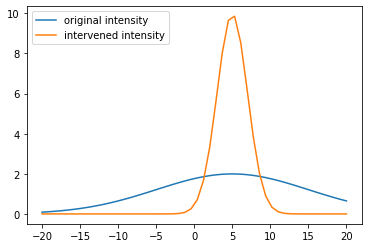

In [15]:
# plotting the intensities first
x = np.linspace(-20, 20)
plt.plot(x, normal_1(x), label='original intensity')
plt.plot(x, normal_2(x), label='intervened intensity')
plt.legend()
# plt.savefig('../intensities.png', format = 'png', dpi = 900)
plt.show()

# Sampling From Lambda_max

In [16]:
# sampling from lambda_max, statring with zero
lambda_max = 10
number_of_samples = 50
sample = np.zeros(number_of_samples)
sample[0] = 0
for i in range(1, number_of_samples):
    sample[i] = homogenous_poisson(lambda_max, sample[i-1])
lambdas = normal_1(sample)
accepted, indicators = thinning(lambdas, lambda_max, sample)
print('All events:\n', sample)
print('{} out of {} samples accepted.'.format(len(accepted), number_of_samples))
print('accepted events:\n', accepted)
print('indicators:\n', indicators)

All events:
 [0.         0.04680491 0.20882195 0.35493317 0.44460009 0.46438863
 0.46660733 0.57347098 0.62131533 0.63029568 0.67360734 0.70707027
 0.89437714 0.9035899  0.96511789 1.06598308 1.10703053 1.18885082
 1.22898124 1.65256952 1.70476963 1.8767418  2.06633722 2.14989729
 2.27207882 2.29581335 2.35185498 2.46823837 2.47795495 2.57100556
 2.64227841 2.86686372 2.97383531 2.99237102 3.23860527 3.28560785
 3.39854324 3.50218446 3.65137894 3.75330734 3.98028612 4.46340963
 4.47096006 4.50971913 4.52250575 4.85430012 5.1130477  5.21359861
 5.24789598 5.3518012 ]
6 out of 50 samples accepted.
accepted events:
 [0.20882195 1.10703053 1.18885082 2.29581335 4.50971913 5.1130477 ]
indicators:
 [False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

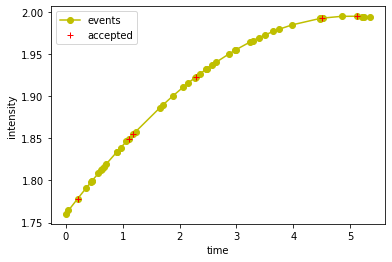

In [17]:
plt.plot(sample,lambdas, '-oy', label = 'events')
plt.plot(sample[indicators],lambdas[indicators], 'r+', label = 'accepted')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../sample_max.png', format = 'png', dpi = 900)

In [18]:
counterfactuals, counterfactual_indicators = sample_counterfactual(sample, lambdas, lambda_max, indicators, normal_2)
print('counterfactuals:\n', counterfactuals)
print(len(counterfactuals))

counterfactuals:
 [1.107030525038901, 1.1888508191165321, 2.295813351388893, 2.8668637249663202, 2.9923710196209594, 3.2386052733766855, 3.2856078521572956, 3.3985432372972153, 3.502184458016796, 3.6513789383137274, 3.7533073412632567, 3.9802861172158037, 4.463409631582044, 4.470960060622093, 4.509719126367789, 4.5225057526801775, 4.8543001152484555, 5.113047703001958, 5.213598610454239, 5.2478959849454965, 5.351801198951643]
21


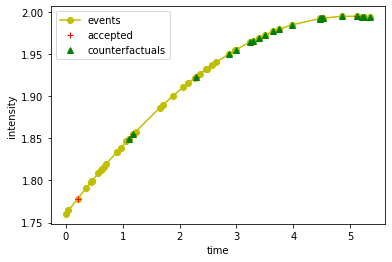

In [19]:
plt.plot(sample,lambdas, '-oy', label = 'events')
plt.plot(sample[indicators],lambdas[indicators], 'r+', label = 'accepted')
plt.plot(counterfactuals, lambdas[counterfactual_indicators], 'g^', label = 'counterfactuals')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../counter_max.png', format = 'png', dpi = 900)

As we can see, all of the accepted events that have higher intensity, are also accepted in the counter factual.

In [20]:
check_monotonicity(sample, counterfactuals, normal_1, normal_2, accepted)

MONOTONIC


# Real-World Scenario

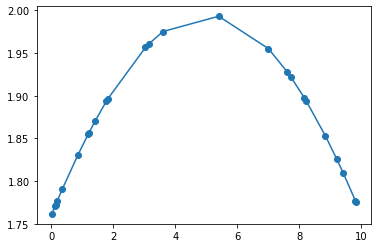

In [21]:
h_observed, lambda_observed, h_rejected, lambda_bar_rejected = superposition(lambda_max, normal_1, 5, 25)
plt.plot(h_observed, lambda_observed, '-o')
# plt.savefig('../observed.png', format = 'png', dpi = 900)

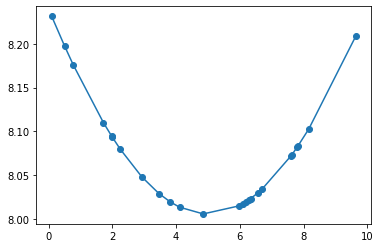

In [22]:
plt.plot(h_rejected, lambda_bar_rejected, '-o')
# plt.savefig('../superposition.png', format = 'png', dpi = 900)

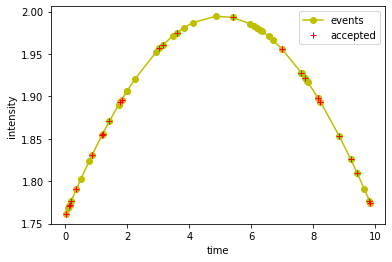

In [23]:
sample_rc, lambdas_rc, indicators_rc = combine(h_observed, lambda_observed, h_rejected, normal_1)
plt.plot(sample_rc,lambdas_rc, '-oy', label = 'events')
plt.plot(sample_rc[indicators_rc],lambdas_rc[indicators_rc], 'r+', label = 'accepted')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../combine.png', format = 'png', dpi = 900)

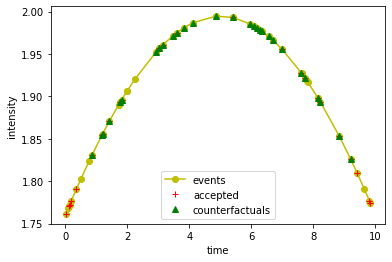

In [24]:
counterfactuals_rc, counterfactual_indicators_rc = sample_counterfactual(sample_rc, lambdas_rc, lambda_max, indicators_rc, normal_2)
plt.plot(sample_rc,lambdas_rc, '-oy', label = 'events')
plt.plot(sample_rc[indicators_rc],lambdas_rc[indicators_rc], 'r+', label = 'accepted')
plt.plot(counterfactuals_rc, lambdas_rc[counterfactual_indicators_rc], 'g^', label = 'counterfactuals')
# plt.plot(x, normal_1(x), label='original intensity')
# plt.plot(x, normal_2(x), label='intervened intensity')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../counter_real.png', format = 'png', dpi = 900)

In [25]:
check_monotonicity(sample_rc, counterfactuals_rc, normal_1, normal_2, h_observed)

MONOTONIC
